In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from numpy import loadtxt
from keras import models

In [2]:
#importando o modelo de IA
model = models.load_model('model_Magalu.h5')#Magalu
#model = models.load_model('model_Petrobras.h5')#Petrobras

In [3]:
#chave de acesso ao yahoofinances, pegando as ações das empresas
acao = "MGLU3.SA" #Magalu
#acao = "PETR4.SA" #Petrobras
inicio = "2014-12-31"
final = dt.datetime.today().strftime('%Y-%m-%d')

dados_acao = yf.download(acao, inicio, final)
dados_acao

[*********************100%%**********************]  1 of 1 completed


In [4]:
#A Cotação não pode ser ajustada
#Criando um array para trabalhar com Vetores

cotacao = dados_acao['Close'].to_numpy().reshape(-1,1)
cotacao

In [5]:
tamanho_dados= int(len(cotacao) * 0.8)

In [6]:
#Escalar dados entre 0 e 1, para deixar mais facil processamento
#dados em escala pré definidos são mais faceis de usar
escalador = MinMaxScaler(feature_range=(0,1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados, :])

dados_entre_0_e_1_teste = escalador.fit_transform(cotacao[tamanho_dados:, :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

In [7]:
#criar os dados de teste
dados_teste = dados_entre_0_e_1[tamanho_dados - 60: , :]

teste_x = []
teste_y = cotacao[tamanho_dados:, :]

for i in range(60, len(dados_teste)):
  teste_x.append(dados_teste[i-60:i, 0])

In [8]:
#reshape
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [9]:
#pegando predições do modelo

predicoes = model.predict(teste_x)

#tirando a escala dos dados

predicoes = escalador.inverse_transform(predicoes)

predicoes

15/15 [==============================] - 1s 9ms/step


array([[16.082508 ],
       [25.009747 ],
       [27.950449 ],
       [26.349854 ],
       [25.629608 ],
       [25.886082 ],
       [28.63353  ],
       [28.702757 ],
       [27.268328 ],
       [26.380293 ],
       [24.80012  ],
       [25.325268 ],
       [25.75933  ],
       [24.611433 ],
       [25.442844 ],
       [25.599892 ],
       [27.426657 ],
       [31.335274 ],
       [30.156965 ],
       [30.722902 ],
       [29.176186 ],
       [30.841347 ],
       [29.007372 ],
       [33.51881  ],
       [38.317703 ],
       [39.442055 ],
       [38.19541  ],
       [38.245064 ],
       [36.02376  ],
       [36.296246 ],
       [39.389793 ],
       [42.721394 ],
       [44.333145 ],
       [43.409126 ],
       [42.93413  ],
       [42.861828 ],
       [40.674847 ],
       [41.56932  ],
       [40.521927 ],
       [41.044918 ],
       [38.088966 ],
       [40.637325 ],
       [41.48917  ],
       [45.266174 ],
       [44.344597 ],
       [42.387074 ],
       [41.231754 ],
       [42.31

In [10]:
#pegando o erro medio quadratico (RMSE)

rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

0.2165402000785893

In [11]:
#criando o grafico do modelo

treinamento = dados_acao.iloc[: tamanho_dados, :]
df_teste = pd.DataFrame({"Close" : dados_acao['Close'].iloc[tamanho_dados:],
                         "predicoes":predicoes.reshape(len(predicoes))})

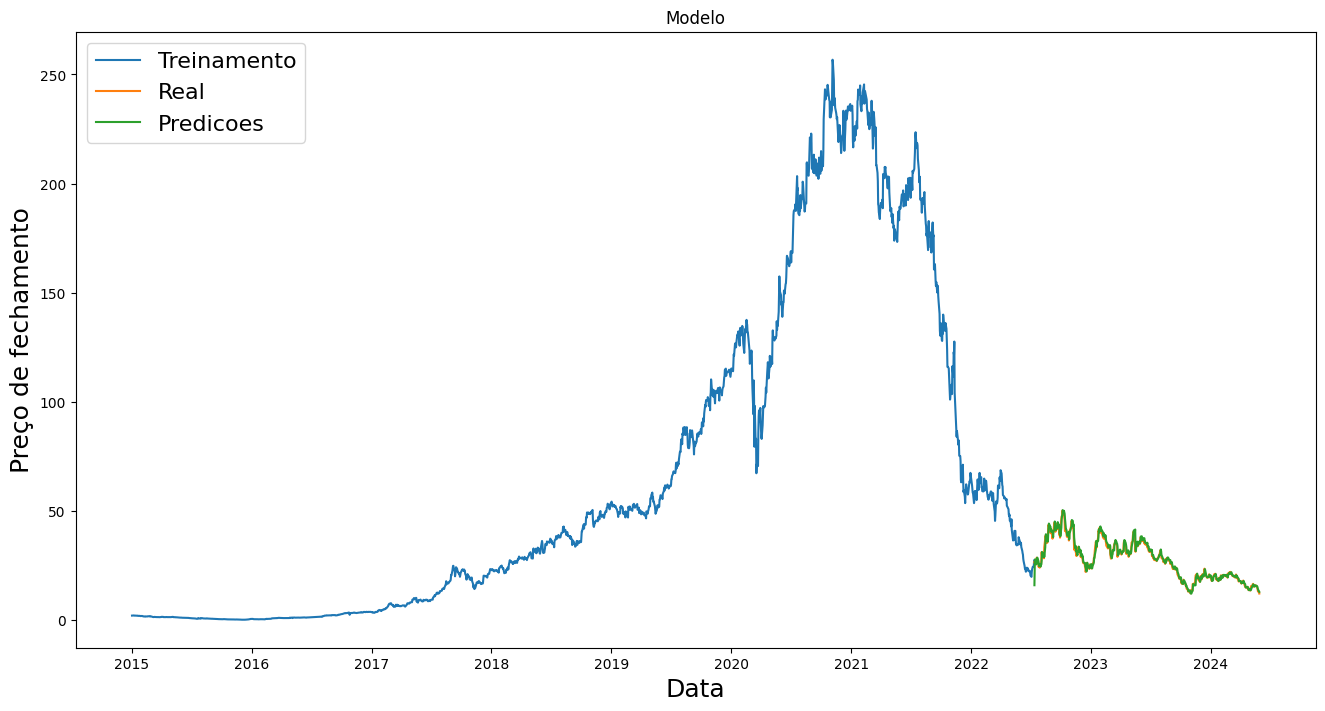

In [12]:
plt.figure(figsize = (16,8))
plt.title('Modelo')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço de fechamento', fontsize=18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predicoes'], loc=2, prop={'size':16})
plt.show()

In [15]:
df_teste

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2022-07-14,27.217909,25.009747,0.028269,0.555090,True,True,True,0.028269
2022-07-15,26.001987,27.950449,-0.044674,0.117582,False,True,False,0.044674
2022-07-18,25.908457,26.349854,-0.003597,-0.057265,False,False,True,0.003597
2022-07-19,26.095522,25.629608,0.007220,-0.027334,True,False,False,0.007220
2022-07-20,28.714426,25.886082,0.100358,0.010007,True,True,True,0.100358
...,...,...,...,...,...,...,...,...
2024-05-22,14.700000,15.427117,-0.051613,-0.013707,False,False,True,0.051613
2024-05-23,14.200000,14.761044,-0.034014,-0.043176,False,False,True,0.034014
2024-05-24,13.200000,14.165507,-0.070423,-0.040345,False,False,True,0.070423


In [14]:
#calcular media de acertos e lucro
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1] / media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.034728
True     0.037336
Name: variacao_percentual_acao_abs, dtype: float64
1.0751121698474906
0.49678800856531047
0.10727742416273417


In [13]:
df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0,
                                               True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0,
                                               True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero'] ,
                                      True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

<ipython-input-13-d3bb8e909a7f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0,
<ipython-input-13-d3bb8e909a7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0,
<ipython-input-13-d3bb8e909a7f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2022-07-14,27.217909,25.009747,0.028269,0.555090,True,True,True,0.028269
2022-07-15,26.001987,27.950449,-0.044674,0.117582,False,True,False,0.044674
2022-07-18,25.908457,26.349854,-0.003597,-0.057265,False,False,True,0.003597
2022-07-19,26.095522,25.629608,0.007220,-0.027334,True,False,False,0.007220
2022-07-20,28.714426,25.886082,0.100358,0.010007,True,True,True,0.100358
...,...,...,...,...,...,...,...,...
2024-05-22,14.700000,15.427117,-0.051613,-0.013707,False,False,True,0.051613
2024-05-23,14.200000,14.761044,-0.034014,-0.043176,False,False,True,0.034014
2024-05-24,13.200000,14.165507,-0.070423,-0.040345,False,False,True,0.070423
